In [1]:
import torch
import matplotlib.pyplot as plt

In [8]:
a + a

tensor([ 2.,  4.,  6.,  8., 10.])

In [2]:
import numpy as np
import pandas as pd
import bloscpack as bp

from sklearn.model_selection import StratifiedKFold
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

import imgaug as ia
import imgaug.augmenters as iaa

from torch.utils.data.dataloader import DataLoader

import fastai
from fastai.vision import *
from fastai.callbacks import *

from optim import Over9000
from torch.optim import SGD, Adam

from data import Bengaliai_DS
# from model import PretrainedCNN, BengaliClassifier
from models_mg import mdl_ResDenHybrid, mdl_sext50, mdl_res34_localpool_small, mdl_res34_localpool
# from senet_heng import seresxt50heng
# from senet_mod import SENetMod

from callback_utils import SaveModelCallback
from mixup_fastai_utils import MuGmCallback_InnerPeace, MuCmCallback
from loss import Loss_combine_weighted_v2
from metric import Metric_grapheme, Metric_vowel, Metric_consonant, Metric_tot

In [5]:
SEED = 19550423

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(SEED)


In [6]:
augs = iaa.OneOf(
    [
        iaa.Affine(rotate=(-15, 15)),
        iaa.Affine(shear={'x': (-10, 10), 'y': (-10, 10)}),
        iaa.PerspectiveTransform(scale=.09, keep_size=True),
    ]
)

In [7]:
pdf = pd.read_csv('../input/train.csv')
unique_grapheme = pdf['grapheme'].unique()
grapheme_code = dict([(g, c) for g, c in zip(unique_grapheme, np.arange(unique_grapheme.shape[0]))])
pdf['grapheme_code'] = [grapheme_code[g] for g in pdf['grapheme']]

skf = MultilabelStratifiedKFold(n_splits=5, shuffle=True, random_state=19550423)
for fold, (trn_ndx, vld_ndx) in enumerate(skf.split(pdf['image_id'].values.reshape(-1, 1), pdf.loc[:, ['grapheme_root', 'vowel_diacritic', 'consonant_diacritic']].values)):
    if fold == 0:
        break


In [14]:
imgs = bp.unpack_ndarray_from_file('../features/train_images_raw_64112.bloscpack')
lbls = pd.read_csv('../input/train.csv').iloc[:, 1:4].values

trn_imgs = imgs[trn_ndx]
trn_lbls = lbls[trn_ndx]
vld_imgs = imgs[vld_ndx]
vld_lbls = lbls[vld_ndx]

In [15]:
N_EPOCHS = 150

checkpoint_name = 'purepytorch_wtf_sext50_lessaug_mucu_sgd_cosanneal_fld0'

reduction = 'mean'

In [16]:
batch_size = 64 # 64 is important as the fit_one_cycle arguments are probably tuned for this batch size

training_set = Bengaliai_DS(trn_imgs, trn_lbls, transform=augs, RGB=False)
validation_set = Bengaliai_DS(vld_imgs, vld_lbls, RGB=False)

training_loader = DataLoader(training_set, batch_size=batch_size, num_workers=4, shuffle=True)
validation_loader = DataLoader(validation_set, batch_size=batch_size, num_workers=4, shuffle=False)

data_bunch = DataBunch(train_dl=training_loader, valid_dl=validation_loader)


In [17]:
# logger = utils.csv_logger(['training_loss', 'validation_loss', 'GRAPHEME_Recall', 'VOWEL_Recall', 'CONSONANT_Recall', 'Final_Recall'])

for i in range(N_EPOCHS):
#     logger.new_epoch()
    # train
#     classifier.train()
    
    epoch_trn_loss = []
    epoch_vld_loss = []
    epoch_vld_recall_g, epoch_vld_recall_v, epoch_vld_recall_c, epoch_vld_recall_all = [], [], [], []
    
    for j, (trn_imgs_batch, trn_lbls_batch) in enumerate(training_loader):
        
#         optimizer.zero_grad()
        
        # mixup / cutmix
        #trn_imgs_batch_mixup, trn_lbls_batch, trn_lbls_batch_mixup, gamma = MuCm_InnerPeace_fastai(trn_imgs_batch, trn_lbls_batch)
        
        
        break
        
    break

In [3]:
classifier = mdl_res34_localpool_small()

In [18]:
trn_imgs_batch.shape

torch.Size([64, 1, 64, 112])

In [19]:
classifier.feature_extractor(trn_imgs_batch).shape

torch.Size([64, 512, 4, 7])

In [20]:
a = classifier.gpool(classifier.feature_extractor(trn_imgs_batch))

In [21]:
a[1].shape

torch.Size([512, 2, 5])

In [14]:
a = classifier(trn_imgs_batch)

In [10]:
learn = Learner(
    data_bunch,
    classifier,
    loss_func=Loss_combine_weighted_v2(),
    opt_func=Adam,
    metrics=[Metric_grapheme(), Metric_vowel(), Metric_consonant(), Metric_tot()]
)

In [82]:
aaa = MuGmCallback_InnerPeace(learn, alpha=1.)

In [84]:
bbbb = aaa.on_batch_begin(trn_imgs_batch, trn_lbls_batch, True)
bbb = bbbb['last_input'].cpu().numpy()

In [ ]:
bbbb

In [85]:
ndxiter = iter(np.arange(64))

In [86]:
count = 0

In [172]:
count += 1

In [174]:
count

21

In [173]:
ndx = next(ndxiter)
print(ndx)
plt.imshow(bbb[ndx, 0])

StopIteration: 

In [8]:
logits_g, logits_v, logits_c = classifier(trn_imgs_batch_mixup_device)

In [10]:
loss_g = mixup_loss(logits_g, trn_lbls_batch_device[:, 0], trn_lbls_batch_mixup_device[:, 0], gamma_device)
loss_v = mixup_loss(logits_v, trn_lbls_batch_device[:, 1], trn_lbls_batch_mixup_device[:, 1], gamma_device)
loss_c = mixup_loss(logits_c, trn_lbls_batch_device[:, 2], trn_lbls_batch_mixup_device[:, 2], gamma_device)

In [13]:
loss_g.mean()

tensor(5.5962, device='cuda:0', grad_fn=<MeanBackward0>)

In [14]:
losses = criterion(logits, trn_lbls_oh_batch_mixup)

In [15]:
losses

[tensor(5.6103, grad_fn=<MeanBackward0>),
 tensor(2.7704, grad_fn=<MeanBackward0>),
 tensor(2.5147, grad_fn=<MeanBackward0>)]

In [8]:
a = trn_imgs_batch_mixup.detach().numpy()

In [9]:
import matplotlib.pyplot as plt

In [21]:
trn_lbls_oh_batch_mixup[1][18]

tensor([0.0000, 0.0000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5000, 0.0000,
        0.0000, 0.0000])

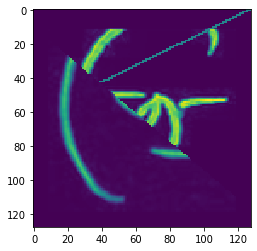

In [19]:
plt.imshow(a[18, 0])